In [2]:
import numpy, pandas, matplotlib, yfinance, scipy
print("Libraries imported successfully!")

Libraries imported successfully!


#Day 1: Numpy and sciPy Basics
Initial quant finance tasks: random matrix with NumPy, normal distribution fit with SciPy

Matrix Mean: 0.501486, Std Dev: 0.290163


Matplotlib is building the font cache; this may take a moment.


Fitted Mean: 0.027680, Fitted Std Dev: 0.992032


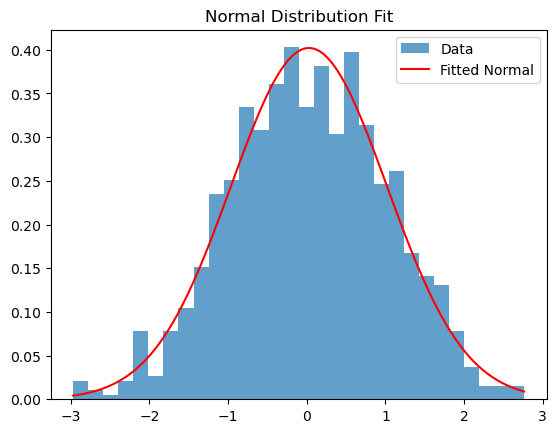

In [4]:
import numpy as np
matrix = np.random.rand(50, 50) # 50x50 matrix, valurs in [0,1)
mean = np.mean(matrix)
std_dev = np.std(matrix)
print(f"Matrix Mean: {mean:.6f}, Std Dev: {std_dev:6f}")

from scipy import stats
import matplotlib.pyplot as plt
data = stats.norm. rvs(loc=0, scale=1, size=1000) # 1000 samples, N(0,1)
mu, sigma = stats.norm.fit(data) # Fit normal distribution
print(f"Fitted Mean: {mu:.6f}, Fitted Std Dev: {sigma:.6f}")
plt.hist(data, bins=30, density =True, alpha=0.7, label="Data")
x = np.linspace(min(data), max(data), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Normal Distribution Fit")
plt.legend()
plt.show()


# Random Variables Notes
- Random variable: Represents random process outcomes (e.g., coin toss result).
- Discrete: Countable values (e.g., 0 or 1).
- Continuous: Range of values (e.g., stock returns).
- Expected value: Probability-weighted average e.g., coin toss (0.5*0 + 0.5*1 = 0.5)

In [5]:
from scipy import stats
import numpy as np
coin_tosses = stats.bernoulli.rvs(p=0.5, size=1000) # 1000 coin tosses
mean_tosses = np.mean(coin_tosses)
print(f"Simulated Coin Toss Mean: {mean_tosses:.6f}") # ~0.5

Simulated Coin Toss Mean: 0.511000


"#Random Variables: Expected Value".


# Day 2: AAPL Stock Analysis
Analysing AAPL stock data with pandas, yfinanace, and SciPy

AAPL Mean Daily Return: 0.000115, Std Dev: 0.019965
Fitted Normal - Mean: 0.000115, Std Dev: 0.019925


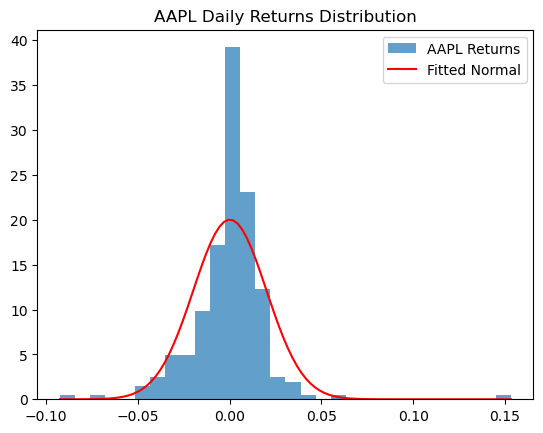

In [6]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Download AAPL data (1 year, daily)
aapl = yf.download('AAPL', start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)
# Calculate daily returns
aapl['Daily Return'] = aapl['Close'].pct_change().dropna()
# Stats
mean_return = aapl['Daily Return'].mean()
std_return = aapl['Daily Return'].std()
print(f"AAPL Mean Daily Return: {mean_return:.6f}, Std Dev: {std_return:.6f}")

# SciPy: Fit normal distribution to returns
returns = aapl['Daily Return'].dropna()
mu, sigma = stats.norm.fit(returns)
print(f"Fitted Normal - Mean: {mu:.6f}, Std Dev: {sigma:.6f}")

# Plot histogram with fitted curve
plt.hist(returns, bins=30, density=True, alpha=0.7, label="AAPL Returns")
x = np.linspace(min(returns), max(returns), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("AAPL Daily Returns Distribution")
plt.legend()
plt.show()

# Variance Notes
- Variance: Measures spread of data around mean.
- Formula: σ² = Σ(x_i - μ)² / N.
-  Used in quant finance to assess risk (e.g., stock volatility).

In [7]:
variance = aapl['Daily Return'].var()
print(f"AAPL Returns Variance: {variance:.6f}")

AAPL Returns Variance: 0.000399


In [9]:
def twoSum(nums, target):
    seen = {}
    for i, num in enumerate(nums):
        complement = target - num
        if complement in seen:
            return [seen[complement], i]
        seen[num] = i
    return []

# Test
nums = [2, 7, 11, 15]
target = 9
print(twoSum(nums, target)) # Should print [0, 1]

[0, 1]


# LeetCode: Two Sum
- Problem: Find indices of two numbers in array that sum to target.
- Solution: Use hash map for 0(n) time complexity.

# Day 3: Multi-Stock Portfolio Analysis
Analyzing AAPL, MSFT, GOOGL returns with pandas, yfinance, SciPy.


Portfolio mean Daily Return: 0.000496, Std Dev: 0.015473
Fitted Normal - Mean: 0.000496, Std Dev: 0.015442


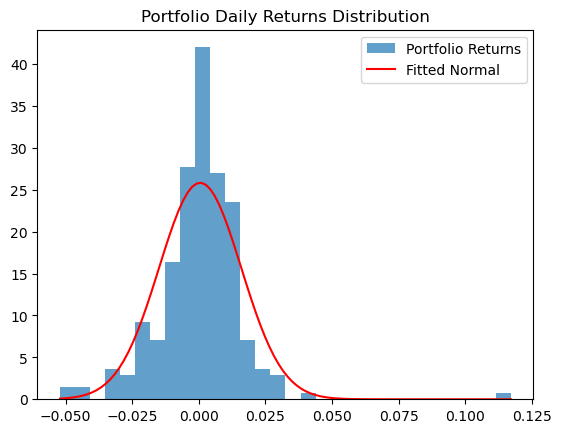

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy import stats
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
# Calculate daily returns
returns = data.pct_change().dropna()
# Equal-weighted portfolio (1/3 each)
weights = np.array([1/3, 1/3, 1/3])
portfolio_returns = returns.dot(weights)
# Stats
mean_portfolio = portfolio_returns.mean()
std_portfolio = portfolio_returns.std()
print(f"Portfolio mean Daily Return: {mean_portfolio:.6f}, Std Dev: {std_portfolio:.6f}")

# Scipy: Fit normal distribution to portfolio returns
mu, sigma = stats.norm.fit(portfolio_returns)
print(F"Fitted Normal - Mean: {mu:.6f}, Std Dev: {sigma:.6f}")

# Plot
plt.hist(portfolio_returns, bins=30, density=True, alpha=0.7, label="Portfolio Returns")
x = np.linspace(min(portfolio_returns), max(portfolio_returns), 100)
plt.plot(x, stats.norm.pdf(x, mu, sigma), 'r-', label="Fitted Normal")
plt.title("Portfolio Daily Returns Distribution")
plt.legend()
plt.show()


# Covariance Notes
- Covarinace: Measures joint variablity of two variables
-  Formula: Cov(X, Y) = Σ(x_i - μ_x)(y_i - μ_y) / N.
-  Quant use: Assesses stock return relationships for portfolio risk.

In [4]:
covariance = returns['AAPL'].cov(returns['MSFT'])
print(f"AAPL-MSFT Covariance: {covariance:.6f}")

AAPL-MSFT Covariance: 0.000182


In [5]:
def isValid(s):
    stack = []
    brackets = {')': '(', '}': '{', ']': '['}
    for char in s:
        if char in brackets.values():
            stack.append(char)
        elif char in brackets:
            if not stack or stack.pop() != brackets[char]:
                return False
    return len(stack) == 0

# Test
print(isValid("()[]{}")) # True
print(isValid("{]"))     # False

True
False


# Leetcode: Valid Parentheses
- Problem: Check if parantheses string is valid.
- Solution: Use stack to match opening/closing brackets.

# Day 4: Portfolio Optimization
Optimizing a portfolio of AAPL, MSFT, and GOOGL using SciPy's minimize function.
- objectives:
  - Calculate daily returns and covariance matrix for three stocks.
  - Optimize portfolio weighs to minimize variance (risk).
  - Compute annualized return and volatility.
  - Plot the efficient frontier with optimal portfolio.
  - Include risk-free rate for context (Sharpe ratio calculation).

Optimal Weights - AAPL: 0.1714, MSFT: 0.1959, GOOGL: 0.6327
Portfolio Annualised Return: 0.1592
Portfolio Annualised Volatility: 0.2368
Sharpe Ratio:  0.5454


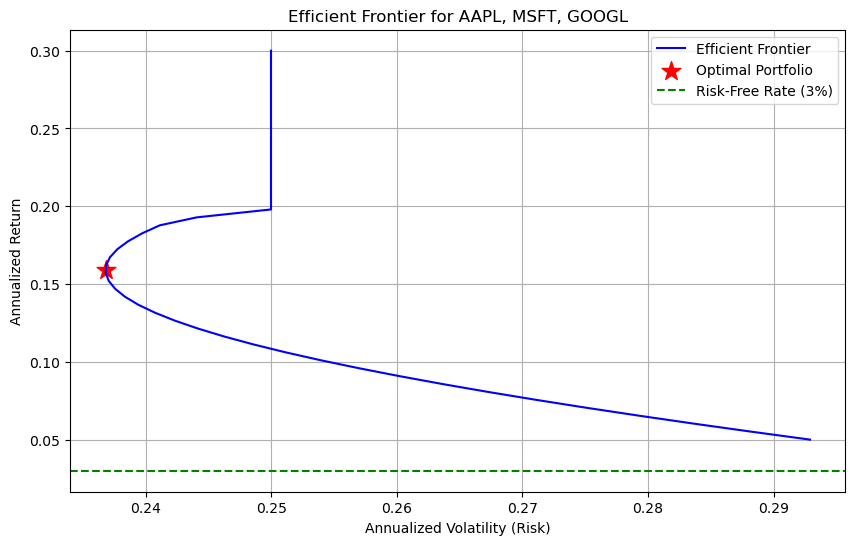

In [9]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.optimize import minimize
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_return(weights, returns, annualise=True):
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret # Annualised or daily
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.03):
    ret = portfolio_return(weights, returns)
    vol = portfolio_volatility(weights, returns, cov_matrix)
    return (ret -risk_free_rate) / vol # Annualised Sharpe ratio

# Covariance matrix
cov_matrix = returns.cov()

# Optimisation setup
num_assets = len(tickers)
constraints = ({'type': 'eq', 'fun': lambda x: np.sum(x) - 1}) # Weights sum to 1
bounds = tuple((0, 1) for num in range(num_assets)) # Weights between 0 and 1
initial_weights = np.array([1/num_assets] * num_assets) # Equal weights


# Minimise volatility
opt_result = minimize(
    fun=lambda w: portfolio_volatility(w, returns, cov_matrix),
    x0=initial_weights,
    method='SLSQP',
    bounds=bounds,
    constraints=constraints
)
opt_weights = opt_result.x
print(f"Optimal Weights - AAPL: {opt_weights[0]:.4f}, MSFT: {opt_weights[1]:.4f}, GOOGL: {opt_weights[2]:.4f}")
print(f"Portfolio Annualised Return: {portfolio_return(opt_weights, returns):.4f}")
print(f"Portfolio Annualised Volatility: {portfolio_volatility(opt_weights, returns, cov_matrix):.4f}")
print(f"Sharpe Ratio:  {sharpe_ratio(opt_weights, returns, cov_matrix):.4f}")

# Efficient frontier
target_returns = np.linspace(0.05, 0.3, 50) # Range of annualised returns
volatilities = []
for r in target_returns:
    cons = (
        {'type': 'eq', 'fun': lambda x: np.sum(x) - 1},
        {'type': 'eq', 'fun': lambda x: portfolio_return(x, returns) -r}
    )
    res = minimize(
        fun=lambda w: portfolio_volatility(w, returns, cov_matrix),
        x0=initial_weights,
        method='SLSQP',
        bounds=bounds,
        constraints=cons
    )
    volatilities.append(res.fun)
plt.figure(figsize=(10, 6))
plt.plot(volatilities, target_returns, 'b-', label="Efficient Frontier")
plt.scatter(
    portfolio_volatility(opt_weights, returns, cov_matrix),
    portfolio_return(opt_weights, returns),
    c='r', marker='*', s=200, label="Optimal Portfolio"
)
plt.axhline(y=0.03, color='g', linestyle='--', label="Risk-Free Rate (3%)")
plt.xlabel("Annualized Volatility (Risk)")
plt.ylabel("Annualized Return")
plt.title("Efficient Frontier for AAPL, MSFT, GOOGL")
plt.legend()
plt.grid(True)
plt.show()
        


# Correlation Notes
- Correlation: Measures linear relationship between variables, [-1, 1].
- Formula: p = Cov(X,Y) / (σ_X * σ_Y).
- Quant application: Low correlation between stocks enhances diversification.

Correlation Matrix:
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.503659  0.577343
GOOGL   0.503659  1.000000  0.563364
MSFT    0.577343  0.563364  1.000000
AAPL-MSFT Correlation: 0.5773


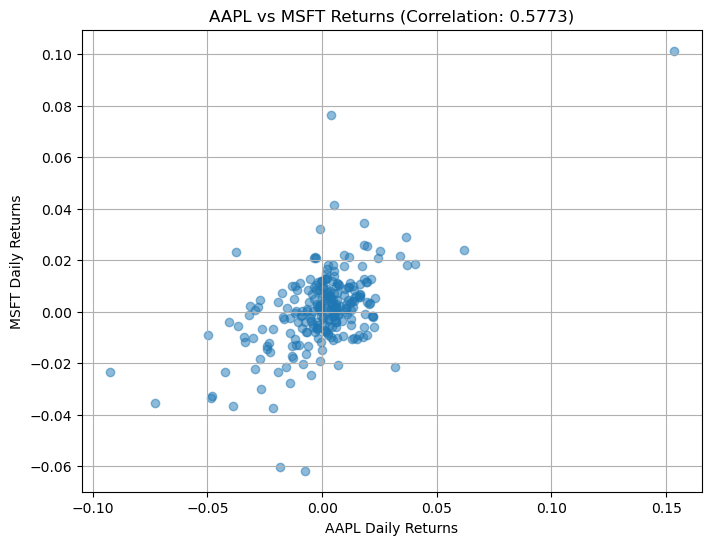

In [11]:
# Correlation matrix
correlation_matrix = returns.corr()
print("Correlation Matrix:")
print(correlation_matrix)
# AAPL-MSFT correlation
correlation_aapl_msft = returns['AAPL'].corr(returns['MSFT'])
print(f"AAPL-MSFT Correlation: {correlation_aapl_msft:.4f}")
# Scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(returns['AAPL'], returns['MSFT'], alpha=0.5)
plt.xlabel("AAPL Daily Returns")
plt.ylabel("MSFT Daily Returns")
plt.title(f"AAPL vs MSFT Returns (Correlation: {correlation_aapl_msft:.4f})")
plt.grid(True)
plt.show()                                            
      

In [17]:
def reverse(x):
    if x == 0:
        return 0
    sign = 1 if x > 0 else -1
    x = abs(x)
    reversed_x = int(str(x)[::-1])
    if reversed_x > 2**31 -1:
        return 0
    return sign * reversed_x

# Test cases
print(reverse(123))       # 321
print(reverse(-123))      # -321
print(reverse(120))       # 21
print(reverse(1534235779)) # 0

321
-321
21
0


# LeetCode: Reverse Integer
- Problem: Reverse digits of an interger, handle 32-bit limits.
- Solution: Convert to string, reverse, check overflow, preserve sign.
- Time complexity: O(log |x|).
- Space complexity: O(1).

# Day 5: Risk Metrics and Distribution Fittings
Analysing risk-adjusted returns and stock price distribution for AAPL, MSFT, GOOGL.
- Objectives:
  - Calculate Sharpe ratios for multiple portfolio weightings.
  - Fit log-normal distribution to AAPL stock prices using SciPy.
  - Plot portfolio metrics and distribution fit.

Portfolio Metrics:
Weights (AAPL, MSFT, GOOGL): 0.33, 0.33, 0.33
Annualised Return: 0.1249, Volatility: 0.2456, Sharpe Ratio: 0.3863
Weights (AAPL, MSFT, GOOGL): 0.50, 0.30, 0.20
Annualised Return: 0.0984, Volatility: 0.2571, Sharpe Ratio: 0.2661
Weights (AAPL, MSFT, GOOGL): 0.20, 0.50, 0.30
Annualised Return: 0.1391, Volatility: 0.2516, Sharpe Ratio: 0.4334
Weights (AAPL, MSFT, GOOGL): 0.30, 0.20, 0.50
Annualised Return: 0.1372, Volatility: 0.2393, Sharpe Ratio: 0.4481


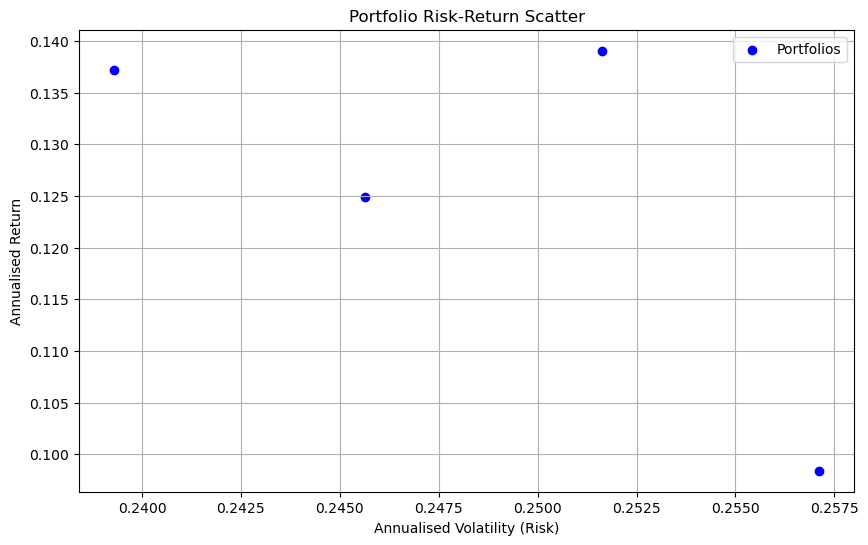

Log-Normal Fit for AAPL -Shape: 0.0724, Scale: 221.6121


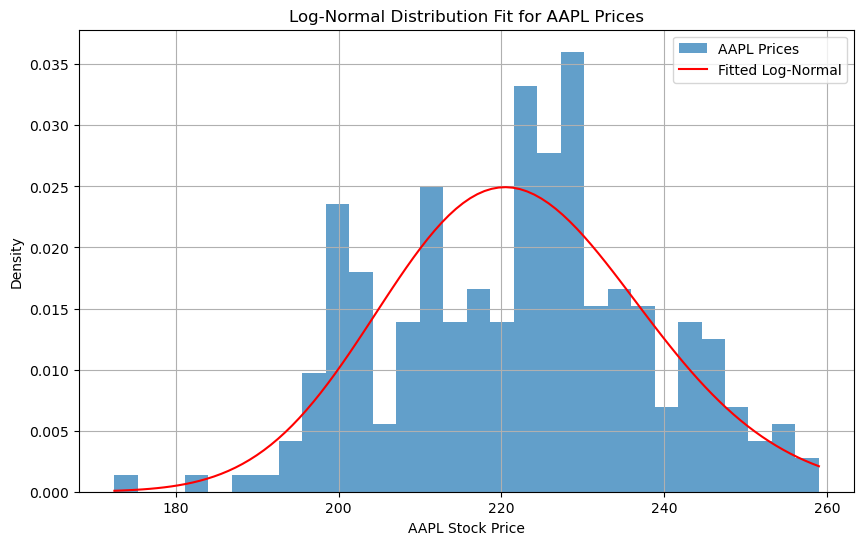

In [3]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import lognorm
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_returns(weights, returns, annualise=True):
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    weights = np.array(weights) # Convert list to NumPy array
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol
def sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.03):
    weights = np.array(weights) # Convert list to NumPy array
    ret = portfolio_returns(weights, returns)
    vol = portfolio_volatility(weights, returns, cov_matrix)
    return (ret - risk_free_rate) / vol

# Covariance matrix
cov_matrix = returns.cov()

# Evaluate multiple portfolio weightings
weight_combinations = [
    [1/3, 1/3, 1/3], # Equal weights
    [0.5, 0.3, 0.2], # AAPL-heavy
    [0.2, 0.5, 0.3], # MSFT-heavy
    [0.3, 0.2, 0.5] # GOOGL -heavy
]
print("Portfolio Metrics:")
for weights in weight_combinations:
    ret = portfolio_returns(weights, returns)
    vol = portfolio_volatility(weights, returns, cov_matrix)
    sharpe = sharpe_ratio(weights, returns, cov_matrix)
    print(f"Weights (AAPL, MSFT, GOOGL): {weights[0]:.2f}, {weights[1]:.2f}, {weights[2]:.2f}")
    print(f"Annualised Return: {ret:.4f}, Volatility: {vol:.4f}, Sharpe Ratio: {sharpe:.4f}")

# Scatter plot of portfolios
returns_vals = [portfolio_returns(w, returns) for w in weight_combinations]
volatilities = [portfolio_volatility(w, returns, cov_matrix) for w in weight_combinations]
plt.figure(figsize=(10, 6))
plt.scatter(volatilities, returns_vals, c='b', marker='o', label="Portfolios")
plt.xlabel("Annualised Volatility (Risk)")
plt.ylabel("Annualised Return")
plt.title("Portfolio Risk-Return Scatter")
plt.legend()
plt.grid(True)
plt.show()

# Fit log_normal distribution to AAPL prices
aapl_prices = data['AAPL'].dropna()
shape, loc, scale = lognorm.fit(aapl_prices, floc=0) # Fit log_normal, fix location=0
print(f"Log-Normal Fit for AAPL -Shape: {shape:.4f}, Scale: {scale:.4f}")

# Plot histogram with fitted log-normal
plt.figure(figsize=(10, 6))
plt.hist(aapl_prices, bins=30, density=True, alpha=0.7, label="AAPL Prices")
x = np.linspace(min(aapl_prices), max(aapl_prices), 100)
plt.plot(x, lognorm.pdf(x, shape, loc, scale), 'r-', label="Fitted Log-Normal")
plt.xlabel("AAPL Stock Price")
plt.ylabel("Density")
plt.title("Log-Normal Distribution Fit for AAPL Prices")
plt.legend()
plt.grid(True)
plt.show()    

## Observations
- Equal-weight portfolio often balances return and risk.
- Log-normal fot captures AAPL price skewness, suitable for stock modelling.

# Log-Normal Distribution Notes
- Log-normal: Variable where ln(x) is normally distributed, x > 0.
- Formula: PDF = 1/(x * σ * sqrt(2π)) * exp(-((ln(x) - μ)^2)/(2σ^2)).
- Quant application: Models stock prices due to positive values and right skew.
- Example: Fitted log-normal to AAPL prices above.

Log(AAPL Prices) - Mean: 5.4009, Std Dev: 0.0724


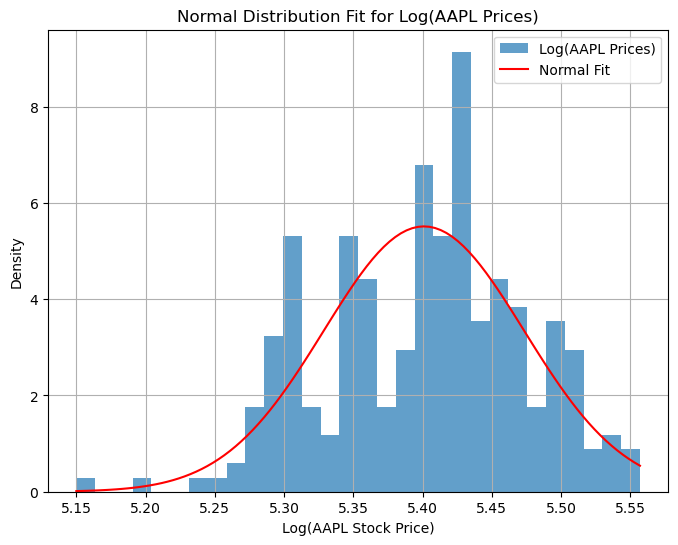

In [8]:
from scipy.stats import norm
import numpy as np
#Calculate log of AAPL prices to check normality
log_prices = np.log(aapl_prices)
mu_log, sigma_log = np.mean(log_prices), np.std(log_prices)
print(f"Log(AAPL Prices) - Mean: {mu_log:.4f}, Std Dev: {sigma_log:.4f}")
# Plot histogram of log prices
plt.figure(figsize=(8, 6))
plt.hist(log_prices, bins=30, density=True, alpha=0.7, label="Log(AAPL Prices)")
x = np.linspace(min(log_prices), max(log_prices), 100)
plt.plot(x, norm.pdf(x, mu_log, sigma_log), 'r-', label="Normal Fit")
plt.xlabel("Log(AAPL Stock Price)")
plt.ylabel("Density")
plt.title("Normal Distribution Fit for Log(AAPL Prices)")
plt.legend()
plt.grid(True)
plt.show()

In [12]:
class ListNode:
    def __init__(self, val=0, next=None):
        self.val = val
        self.next = next

def addTwoNumbers(l1, l2):
    dummy = ListNode(0)
    current = dummy
    carry = 0
    while l1 or l2 or carry:
        x = l1.val if l1 else 0
        y = l2.val if l2 else 0
        total = x + y + carry
        carry = total // 10
        current.next = ListNode(total % 10)
        current = current.next
        l1 = l1.next if l1 else None
        l2 = l2.next if l2 else None
    return dummy.next

# Test Cases
def create_linked_list(nums):
    dummy = ListNode(0)
    current = dummy
    for num in nums:
        current.next = ListNode(num)
        current = current.next
    return dummy.next

def print_linked_list(node):
    result = []
    while node:
        result.append(node.val)
        node = node.next
    return result

l1 = create_linked_list([2, 4, 3])
l2 = create_linked_list([5, 6, 4])
result = addTwoNumbers(l1, l2)
print("Add Two Numbers:", print_linked_list(result)) # Expected: [7, 0, 8]
l1 = create_linked_list([0])
l2 = create_linked_list([0])
result = addTwoNumbers(l1, l2)
print("Add Two Numbers:", print_linked_list(result)) # Expected: [0]



Add Two Numbers: [7, 0, 8]
Add Two Numbers: [0]


# LeetCode: Add Two Numbers
- Problem: Add two numbers represented as linked lists (reverse order)
- Solution: Iterate through lists, sum digits with carry, build new list.
- Time complexity: O(max(N, M)), where N, M are list lengths
- Space complexity: O(max(N, M)).

# Log-Normal Distribution Notes
- Log-normal: Variable where ln(x) is normally distributed, x > 0.
- Formula: PDF = 1/(x * σ * sqrt(2π)) * exp(-((ln(x) - μ)^2)/(2σ^2)).
- Quant application: Models stock prices (positive, right-skewed), e.g., AAPL prices fitted above.
- Properties: Mean = exp(μ + σ^2/2), Median = exp(μ), Mode = exp(μ - σ^2).
- Used in Black-Scholes for options pricing, unlike normal distribution for portfolio returns.
Sources: Investopedia, Towards Data Science.

# Day 6: Value-at-Risk and Monte Carlo Simulation
Analysising portfolio risk for AAPL, MSFT, GOOGL using VaR and Monte Carlo methods.
- Objectives
  - Calculate 95% VaR using historical and Monte Carlo methods.
  - Simulate portfolio returns with SciPy.
  - plot VaR and simulated returns distribution

Historical 1-Day VaR (95%): -0.0239 (Portfolio loss: -2.39%)
Monte Carlo 1-Day VaR (95%): -0.0249 (Portfolio loss: -2.49%)


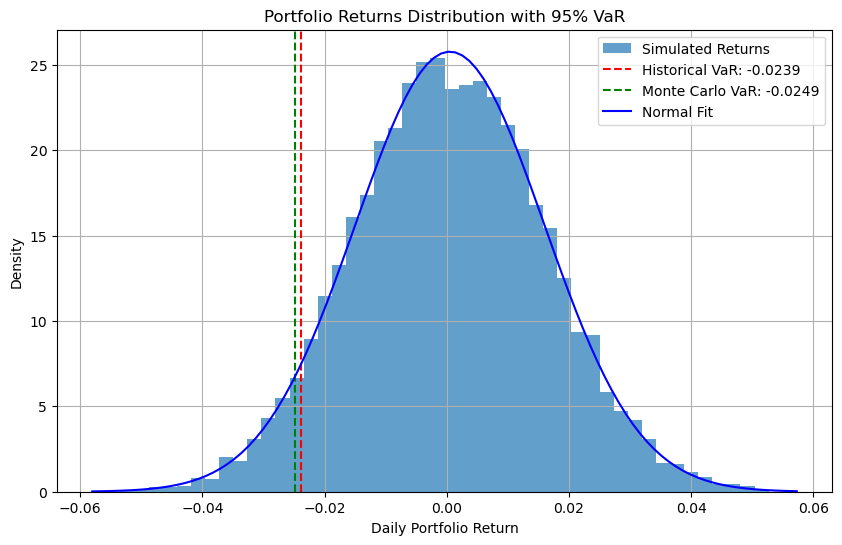

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
from scipy.stats import norm
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL ( 1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_returns(weights, returns, annualise=True):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    weights = np.array(weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol

# Portfolio weights (equal-weighted)
weights = np.array([1/3, 1/3, 1/3])
cov_matrix = returns.cov()

# Historical VaR (95% confidence, 1-day horizon)
portfolio_rets = (returns * weights).sum(axis=1)
var_historical = np.percentile(portfolio_rets, 5) # 5th percentile for 95% VaR
print(f"Historical 1-Day VaR (95%): {var_historical:.4f} (Portfolio loss: {var_historical*100:.2f}%)")

# Monte Carlo VaR (95% confidence, 1-day horizon)
n_simulations = 10000
T = 1 # 1-day horizon
mean_return =  portfolio_returns(weights, returns, annualise=False)
volatility = portfolio_volatility(weights, returns, cov_matrix, annualise=False)
simulated_returns = np.random.normal(mean_return, volatility, n_simulations)
var_monte_carlo = np.percentile(simulated_returns, 5)
print(f"Monte Carlo 1-Day VaR (95%): {var_monte_carlo:.4f} (Portfolio loss: {var_monte_carlo*100:.2f}%)")

# Plot simulated returns distribution with VaR
plt.figure(figsize=(10, 6))
plt.hist(simulated_returns, bins=50, density=True, alpha=0.7, label="Simulated Returns")
plt.axvline(var_historical, color='r', linestyle='--', label=f"Historical VaR: {var_historical:.4f}")
plt.axvline(var_monte_carlo, color='g', linestyle='--', label=f"Monte Carlo VaR: {var_monte_carlo:.4f}")
x = np.linspace(min(simulated_returns), max(simulated_returns), 100)
plt.plot(x, norm.pdf(x, mean_return, volatility), 'b-', label="Normal Fit")
plt.xlabel("Daily Portfolio Return")
plt.ylabel("Density")
plt.title("Portfolio Returns Distribution with 95% VaR")
plt.legend()
plt.grid(True)
plt.show()

## Observations
- Historical VaR reflects actual past losses; Monte Carlo VaR uses simulated returns.
- Both VaR values indicate a 5% chance of losing at least the reported percentage in one day.
- Normal fit assumes returns are normally distributed, which may oversimplify.

# VaR and Monte Carlo Notes
- VaR: Measures potential portfolio loss at a confidence level (e.g., 95%) over a time horizon.
  - Historical: Uses past returns (e.g., 5th percentile).
  - Monte Carlo: Simulates returns using random sampling.
- Monte Carlo: Generates scenarios to estimate distributions, used in VaR and portfolio forecasting.
- Quant application: Risk management, options pricing, portfolio optimisation.

Sources: Investopedia, QuantPy

In [11]:
# Additional VaR calculations
import numpy as np
var_90 = np.percentile(portfolio_rets, 10) # 90% confidence
var_99 = np.percentile(portfolio_rets, 1) # 99% confidence
print(f"Historical 1-Day VaR (90%): {var_90:.4f} (Portfolio loss: {var_90*100:.2f}%)")
print(f"Historical 1-Day VaR (99%): {var_99:.4f} (Portfolio loss: {var_90*100:.2f}%)")

Historical 1-Day VaR (90%): -0.0184 (Portfolio loss: -1.84%)
Historical 1-Day VaR (99%): -0.0422 (Portfolio loss: -1.84%)


## VaR Verification
- 90% VaR: 10% chance of losing at least this amount.
- 99% VaR: 1% chance, indicating worse-case scenarios.

In [14]:
def lengthOfLongestSubstring(s):
    seen = {}
    max_length = 0
    start = 0
    for end in range(len(s)):
        if s[end] in seen and seen[s[end]] >= start:
            start = seen[s[end]] + 1
        else:
            max_length = max(max_length,end - start + 1)
        seen[s[end]] = end 
    return max_length 

# Test cases
print(lengthOfLongestSubstring("abcabcbb")) # Expected: 3
print(lengthOfLongestSubstring("bbbbb"))    # Expected: 1
print(lengthOfLongestSubstring("pwwkew"))   # Expected: 3
print(lengthOfLongestSubstring(""))         # Expected: 0



3
1
3
0


# LeetCode: Longest Substring Without Repeating Characters
- Problem: Find length of longest substring without repeating characters.
- Solution: Use sliding window with hash map to track character indices.
- Time Complexity: 0(n), where n is string length.
- Space complexity: 0(min(m, n)), where m is charset size.

# Day 7: Stress Testing and Correlation Heatmap
Analysing portfolio resilience for AAPL, MSFT, GOOGL under extreme scenarios.
- Objectives:
 - Perform stress testing with a 20% market drop scenario.
 - Create a correlation matrix heatmap using seaborn.
 - Analyse portfolio performance and dependencies.
                    

Stress Test (20% Market Drop):
 Average Daily Portfolio Loss: -1.9995 (-199.95%)
 Annualised Loss: -503.8751 (-50387.51%)


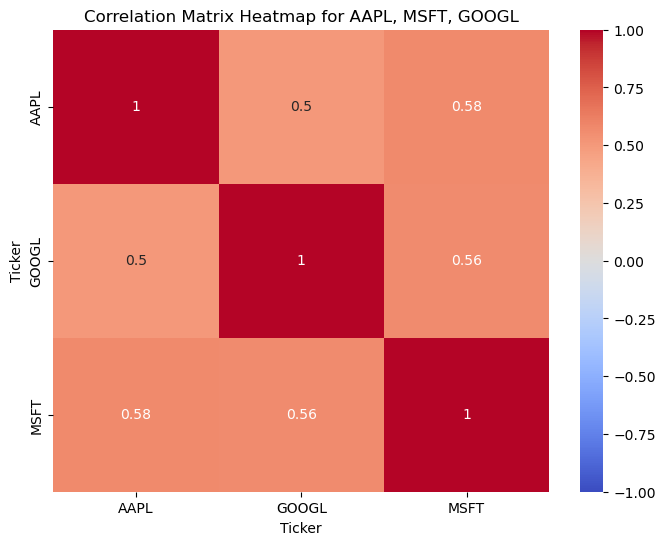

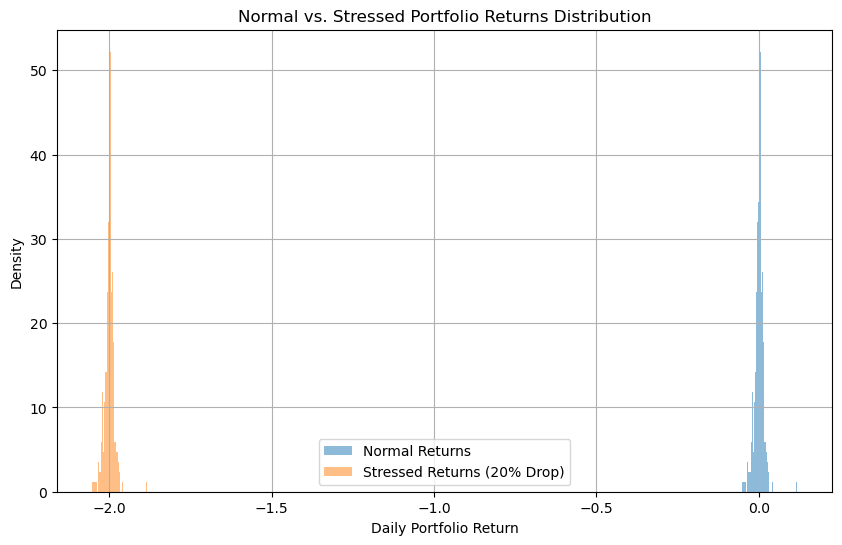

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_returns(weights, returns, annualise=True):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    weights = np.array(weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol

# Portfolio weights (equal-weighted)
weights = np.array([1/3, 1/3, 1/3])
cov_matrix = returns.cov()

# Stress test: Simulate 20% market drop
stress_factor = -2.0 # 20% drop
stressed_returns = returns + stress_factor
portfolio_stressed_rets = (stressed_returns * weights).sum(axis=1)
stressed_loss = np.mean(portfolio_stressed_rets)
print(f"Stress Test (20% Market Drop):")
print(f" Average Daily Portfolio Loss: {stressed_loss:.4f} ({stressed_loss*100:.2f}%)")
print(f" Annualised Loss: {stressed_loss*252:.4f} ({stressed_loss*252*100:.2f}%)")


# Correlation matrix heatmap
corr_matrix = returns.corr()
plt.figure(figsize=(8, 6))
sns.heatmap(corr_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1, center=0)
plt.title("Correlation Matrix Heatmap for AAPL, MSFT, GOOGL")
plt.show()

#Plot stressed vs. normal returns
portfolio_normal_rets = (returns * weights).sum(axis=1)
plt.figure(figsize=(10, 6))
plt.hist(portfolio_normal_rets, bins=50, alpha=0.5, label="Normal Returns", density=True)
plt.hist(portfolio_stressed_rets, bins=50, alpha=0.5, label= "Stressed Returns (20% Drop)", density=True)
plt.xlabel("Daily Portfolio Return")
plt.ylabel("Density")
plt.title("Normal vs. Stressed Portfolio Returns Distribution")
plt.legend()
plt.grid(True)
plt.show()

## Observations
- Stress test shows significant portfolio loss under a 20% market drop, highlighting risk exposure.
- Correlation heatmap indicates dependency between stocks (e.g., high AAPL-MSFT correlation).
- Stressed returns distribution shifts left, reflecting worse outcomes.

# Stress Testing and Correlation Notes
- Stress Testing: Simulates extreme market conditions to assess portfolio risk.
  - Example: 20% market drop shifts return distribution.
  - Quant use: Risk management, capital adequacy.
- Correlation: Measures linear dependency between stock returns (-1 to 1).
  - Formula: ρ = Cov(X,Y)/(σ_X * σ_Y).
  - Quant use: Diversification analysis (low correlation reduces risk).
    
Sources: Investopedia.

In [17]:
# Correlation matrix verification
print("Correlation Matrix:")
print(corr_matrix)

Correlation Matrix:
Ticker      AAPL     GOOGL      MSFT
Ticker                              
AAPL    1.000000  0.503659  0.577343
GOOGL   0.503659  1.000000  0.563364
MSFT    0.577343  0.563364  1.000000


In [21]:
def findMedianSortedArrays(nums1, nums2):
    if len(nums1) > len(nums2):
        nums1, nums2 = nums2, nums1
    x, y = len(nums1), len(nums2)
    start, end = 0, x
    while start <= end:
        partitionX = (start + end) // 2
        partitionY = (x + y + 1) // 2 - partitionX
        maxLeftX = float('-inf') if partitionX == 0 else nums1[partitionX - 1]
        minRightX = float('inf') if partitionX == x else nums1[partitionX]
        maxLeftY = float('-inf') if partitionY == 0 else nums2[partitionY -1]
        minRightY = float('inf') if partitionY == y else nums2[partitionY]
        if maxLeftX <= minRightY and maxLeftY <= minRightX:
            if (x + y) % 2 == 0:
                return (max(maxLeftX, maxLeftY) + min(minRightX, minRightY)) / 2
            else:
                return max(maxLeftX, maxLeftY)

        elif maxLeftX > minRightY:
            end = partition - 1
        else:
            start = partitionX + 1
    raise ValueError("Input arrays are not sorted")

#Test cases
print(findMedianSortedArrays([1, 3,], [2]))     # Expected: 2.0
print(findMedianSortedArrays([1, 2], [3, 4]))   # Expected: 2.5
print(findMedianSortedArrays([0, 0], [0, 0]))   # Expected: 0.0
print(findMedianSortedArrays([], [1]))          # Expected: 1.0

2
2.5
0.0
1


# LeetCode: Median of Two Sorted Arrays
- Problem: Find median of two sorted arrays.
- Solution: Binary search to partition arrays, ensuring median condition.
- Time complexity: O(log(min(m, n))), where m, n are array lengths.
- Space complexity: O(1).

# Day 8: Sortino Ratio and Time Series Analysis
Analysing portfolio performance and trends for AAPL, MSFT, GOOGL.
-Objectives:
 - Calculate Sortino ratio to assess downside risk-adjusted returns.
 - Perform time series analysis with moving averages.
 - Plot portfolio returns and moving averages.


Sortino Ratio (Equal_Weighted Portfolio): 0.3902


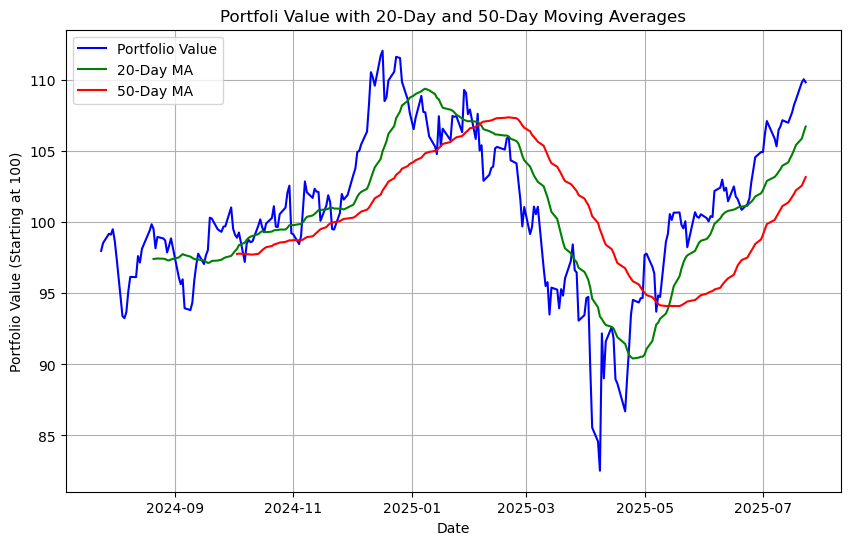

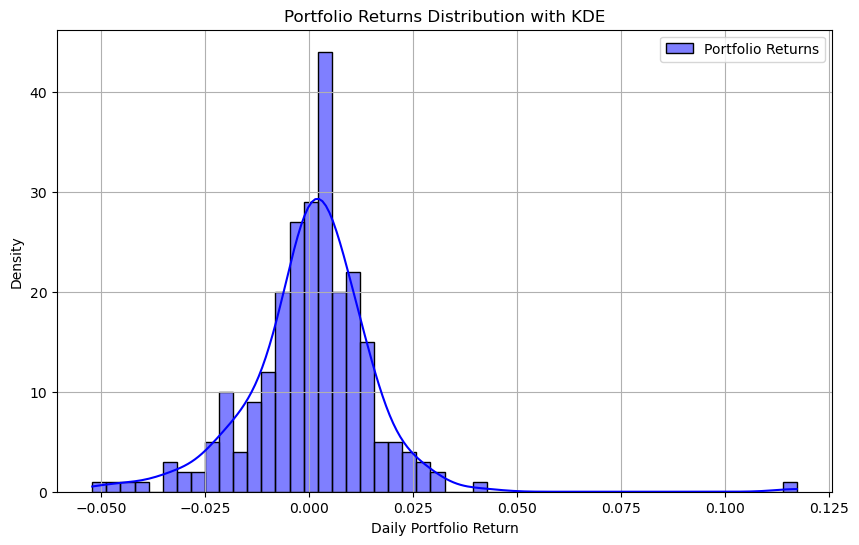

In [24]:
import yfinance as yf
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data =  yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_returns(weights, returns, annualise=True):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret
def portfolio_downside_volatility(weights, returns, cov_matrix, annualise=True):
    weights = np.array(weights)
    portfolio_rets = (returns * weights).sum(axis=1)
    downside_rets = portfolio_rets[portfolio_rets < 0]
    vol = np.sqrt(np.mean(downside_rets**2)) if len(downside_rets) > 0 else 0
    return vol * np.sqrt(252) if annualise else vol
def sortino_ratio(weights, returns, cov_matrix, risk_free_rate=0.03):
    ret = portfolio_returns(weights, returns, annualise=True)
    downside_vol = portfolio_downside_volatility(weights,returns, cov_matrix, annualise=True)
    return (ret - risk_free_rate) / downside_vol if downside_vol != 0 else np.inf

# Portfolio weights (equal-weighted)
weights = np.array([1/3, 1/3, 1/3])
cov_matrix = returns.cov()

# Calculate Sortino ratio
sortino = sortino_ratio(weights, returns, cov_matrix)
print(f"Sortino Ratio (Equal_Weighted Portfolio): {sortino:.4f}")

# Time series analysis: 20-day and 50-day moving averages
portfolio_rets = (returns * weights).sum(axis=1)
portfolio_value = (1 + portfolio_rets).cumprod() * 100 # Start at 100
ma20 = portfolio_value.rolling(window=20).mean()
ma50 = portfolio_value.rolling(window=50).mean()

# Plot portfolio value with moving averages
plt.figure(figsize=(10, 6))
plt.plot(portfolio_value.index, portfolio_value, label="Portfolio Value", color='b')
plt.plot(ma20.index, ma20, label="20-Day MA", color='g')
plt.plot(ma50.index, ma50, label="50-Day MA", color='r')
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Starting at 100)")
plt.title("Portfoli Value with 20-Day and 50-Day Moving Averages")
plt.legend()
plt.grid(True)
plt.show()

# Plt portfolio returns distribution
plt.figure(figsize=(10, 6))
sns.histplot(portfolio_rets, bins=50, kde=True, color='b', label="Portfolio Returns")
plt.xlabel("Daily Portfolio Return")
plt.ylabel("Density")
plt.title("Portfolio Returns Distribution with KDE")
plt.legend()
plt.grid(True)
plt.show()
    

## Observations
- Sortino ratio highlights downside risk, useful for risk-averse investors.
- Moving averages show portfolio trends; 20-day MA is more responsive than 50-day.
- Returns distribution with KDE reveals skewness and volatility

# Sortino Ratio and Time Series Notes
- Sortino Ratio: Measures return per unit of downside risk.
  - Formula: (R_p - R_f) /  σ_d, where σ_d is downside volatility.
  - Quant use: Risk-adjusted performance for loss-focused strategies.
- Time Series: Analyses sequential data (e.g., stock prices).
  - Moving averages: Smooth data to detect trends (e.g., 20-day vs. 50-day).
  - Quant use: Trend analysis, forecasting.

Sources: Investopedia, QuantPy.

In [25]:
# Moving average crossover analysis
crossovers = (ma20 > ma50).astype(int).diff().dropna()
buy_signals = crossovers[crossovers > 0].index
sell_signals = crossovers[crossovers < 0].index
print(f"Buy Signals (20-day MA > 50-day MA): {len(buy_signals)}")
print(f"Sell Signals (20-day MA < 50-day MA): {len(sell_signals)}")


Buy Signals (20-day MA > 50-day MA): 2
Sell Signals (20-day MA < 50-day MA): 1


## Moving Average Verification
- Buy signals: 20-day MA crosses above 50-day MA, indicating potential uptrend.
- Sell signals: 20-day MA crosses below, suggesting downtrend.

In [26]:
def maxArea(height):
    left, right = 0, len(height) - 1
    max_area = 0
    while left < right:
        width = right - left
        h = min(height[left], height[right])
        max_area = max(max_area, width * h)
        if height[left] < height[right]:
            left += 1
        else:
            right -= 1
    return max_area

# Test cases
print(maxArea([1, 8, 6, 2, 5, 4, 8, 3, 7])) # Expected: 49
print(maxArea([1, 1]))                      # Expected: 1
print(maxArea([4, 3, 2, 1, 4]))             # Expected: 16
print(maxArea([1, 2, 1]))                   # Expected: 2

49
1
16
2


# LeetCode: Container With Most Water
- Problem: Find two lines forming a container with maximum water area.
- Solution: Two-pointer technique, moving shorter line to optimize area.
- Time complexity: O(n), where n is array length.
- Space complexity: O(1).

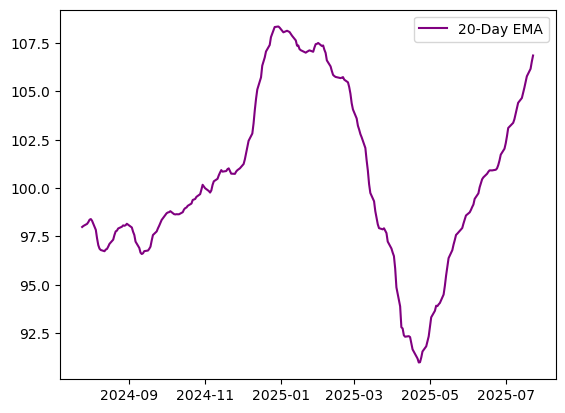

In [29]:
ema20 = portfolio_value.ewm(span=20, adjust=False).mean()
plt.plot(ema20.index, ema20, label="20-Day EMA", color='purple')
plt.legend()
plt.show()

# Day 9: Portfolio Optimization and GARCH Volatility Forecasting
Analysing portfolio optimization and volatility for AAPL, MSFT, GOOGL.
-Objectives:
 - Optimize portfolio weights with max 40% per stock.
 - Forecast volatility using GARCH model.
 - Plot optimized weights and volatility forecast.

Optimal Weights: {'AAPL': np.float64(0.2), 'MSFT': np.float64(0.4), 'GOOGL': np.float64(0.4)}
Expected Annual Return: 0.1441
Expected Volatility: 0.2438
5-day Volatility Forecast: [0.00896264 0.00928084 0.00957915 0.00985965 0.01012408]


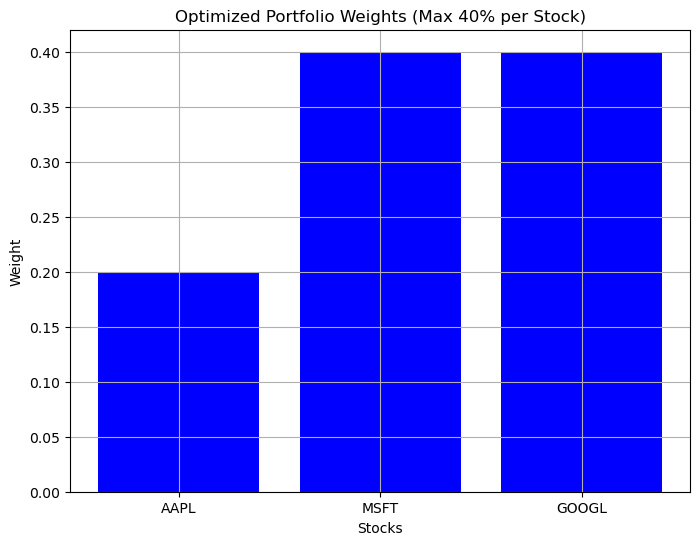

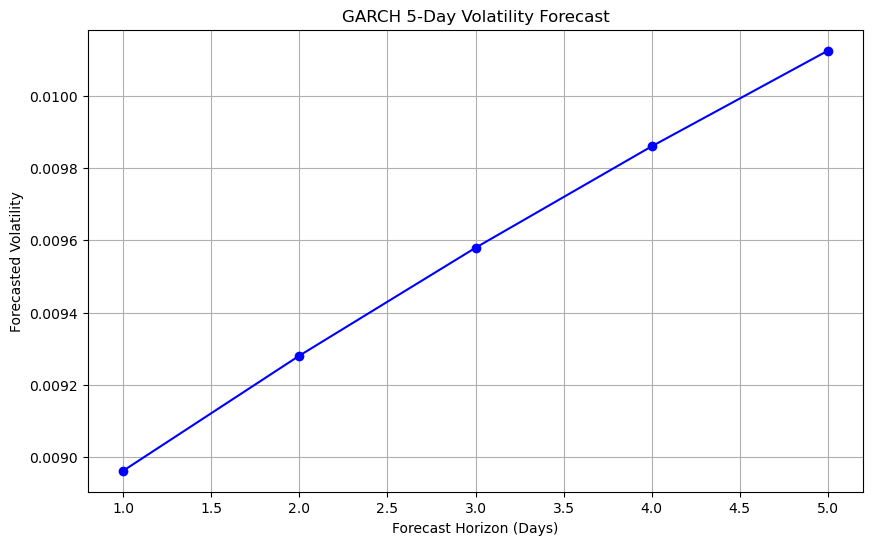

In [4]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy.optimize import minimize
from arch import arch_model

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Portfolio stats functions
def portfolio_returns(weights, returns, annualise=True):
    weights = np.array(weights)
    ret = np.sum(returns.mean() * weights)
    return ret * 252 if annualise else ret
def portfolio_volatility(weights, returns, cov_matrix, annualise=True):
    weights = np.array(weights)
    vol = np.sqrt(np.dot(weights.T, np.dot(cov_matrix * (252 if annualise else 1), weights)))
    return vol
def negative_sharpe_ratio(weights, returns, cov_matrix, risk_free_rate=0.03):
    ret = portfolio_returns(weights, returns, annualise=True)
    vol = portfolio_volatility(weights, returns, cov_matrix, annualise=True)
    return -(ret - risk_free_rate) / vol

# Portfolio optimization with constraints
n_assets = len(tickers)
constraints = [{'type': 'eq', 'fun': lambda w: np.sum(w) - 1},  # Sum to 1
               {'type': 'ineq', 'fun': lambda w: 0.40 - w}]     # Max 40% per stock
bounds = [(0, 0.40) for b in range(n_assets)]
initial_weights = np.array([1/n_assets] * n_assets)
result = minimize(negative_sharpe_ratio, initial_weights, args=(returns, returns.cov()),
                  method='SLSQP', bounds=bounds, constraints=constraints)
optimal_weights = result.x
print(f"Optimal Weights: {dict(zip(tickers, optimal_weights.round(4)))}")
print(f"Expected Annual Return: {portfolio_returns(optimal_weights, returns, annualise=True):.4f}")
print(f"Expected Volatility: {portfolio_volatility(optimal_weights, returns, returns.cov(), annualise=True):.4f}")

# GARCH volatility forecast for portfolio
portfolio_rets = (returns * optimal_weights).sum(axis=1) * 100 # In percentage
garch_model = arch_model(portfolio_rets, vol='Garch', p=1, q=1, dist='Normal')
garch_fit = garch_model.fit(disp='off')
forecast = garch_fit.forecast(horizon=5)
forecasted_vol = np.sqrt(forecast.variance.values[-1, :]) / 100 # Convert to daily
print(f"5-day Volatility Forecast: {forecasted_vol}")

# Plot optimized weights
plt.figure(figsize=(8, 6))
plt.bar(tickers, optimal_weights, color='b')
plt.xlabel("Stocks")
plt.ylabel("Weight")
plt.title("Optimized Portfolio Weights (Max 40% per Stock)")
plt.grid(True)
plt.show()

# Plot GARCH volatility forecast
plt.figure(figsize=(10, 6))
plt.plot(range(1, 6), forecasted_vol, marker='o', color='b')
plt.xlabel("Forecast Horizon (Days)")
plt.ylabel("Forecasted Volatility")
plt.title("GARCH 5-Day Volatility Forecast")
plt.grid(True)
plt.show()

##  Observations
- Optimized weights balance return and risk, constrained to max 40% per stock.
- GARCH model forecasts increasing/decreasing volatility over 5 days.
- Plots visualize portfolio allocation and volatility trends.

# Portfolio Optimization and GARCH Notes
- Portfolio Optimization: Maximizes risk-adjusted return (e.g., Sharpe ratio).
  - Constraints: Weights sum to 1, max 40% per stock.
  - Quant use: Efficient allocation.
- GARCH: Models time-varying volatility.
  - Formula: σ_t^2 = ω + α ε_{t-1}^2 + β σ_{t-1}^2.
  - Quant use: Volatility forecasting, risk management.
    
Sources: Investopedia (https://www.investopedia.com/terms/p/portfolio-optimization.asp), QuantPy (https://quantpy.com.au/advanced-time-series/garch-model/).

In [5]:
# GARCH parameter verification (assumes Python task variables)
print("GARCH Parameters:")
print(garch_fit.params)

GARCH Parameters:
mu          0.082651
omega       0.082825
alpha[1]    0.126087
beta[1]     0.843072
Name: params, dtype: float64


## GARCH Verification
- Parameters (omega, alpha, beta) indicate persistence of volatility.
- High beta suggests strong volatility clustering.

In [7]:
def trap(height):
    if not height:
        return 0
    left, right = 0, len(height) - 1
    left_max = right_max = water = 0
    while left < right:
        if height[left] < height[right]:
            left_max = max(left_max, height[left])
            water += left_max - height[left]
            left += 1
        else:
            right_max = max(right_max, height[right])
            water += right_max - height[right]
            right -= 1
    return water

# Test cases
print(trap([0, 1, 0, 2, 1, 0, 1, 3, 2, 1, 2, 1])) # Expected: 6
print(trap([4, 2, 0, 3, 2, 5]))                   # Expected: 9
print(trap([]))                                   # Expected: 0
print(trap([2, 0, 2]))                            # Expected: 2

6
9
0
2


# LeetCode: Trapping Rain Water
- Problem: Compute water trapped between bars.
- Solution: Two-pointer technique, tracking max heights.
- Time complexity: O(n), where n is array length.
- Space complexity: O(1).


In [8]:
garch_aapl = arch_model(returns['AAPL'] * 100, vol='Garch', p=1, q=1).fit(disp='off')
print(garch_aapl.forecast(horizon=5).variance.values[-1, :] / 100)

[0.01297489 0.01390289 0.01480089 0.01566986 0.01651073]


# Day 10: Monte Carlo Option Pricing and Rolling Correlations
Analysing option pricing and stock correlations for AAPL, MSFT, GOOGL.
- Objectives:
  - Price a European call option using Monte Carlo simulation.
  - Compute rolling correlations between stocks.
  - Plot option price convergence and rolling correlations.

Monte Carlo European Call Option Price (AAPL): $0.00


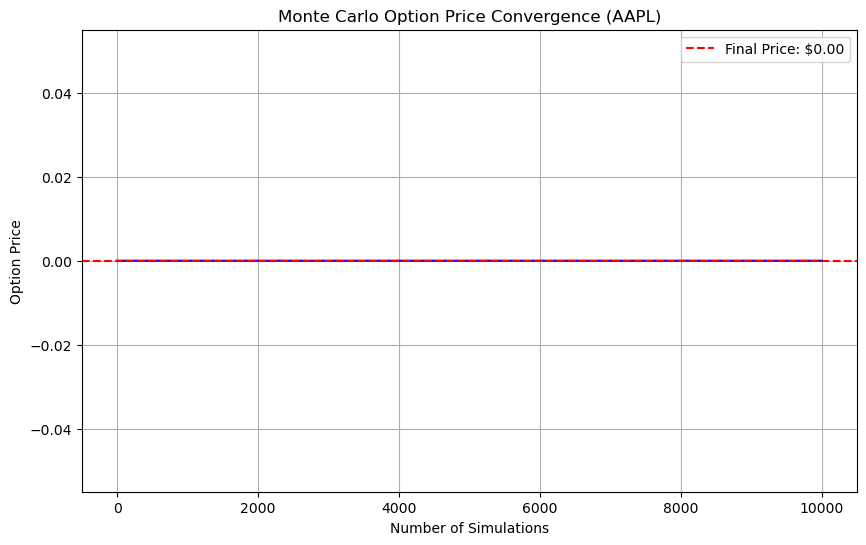

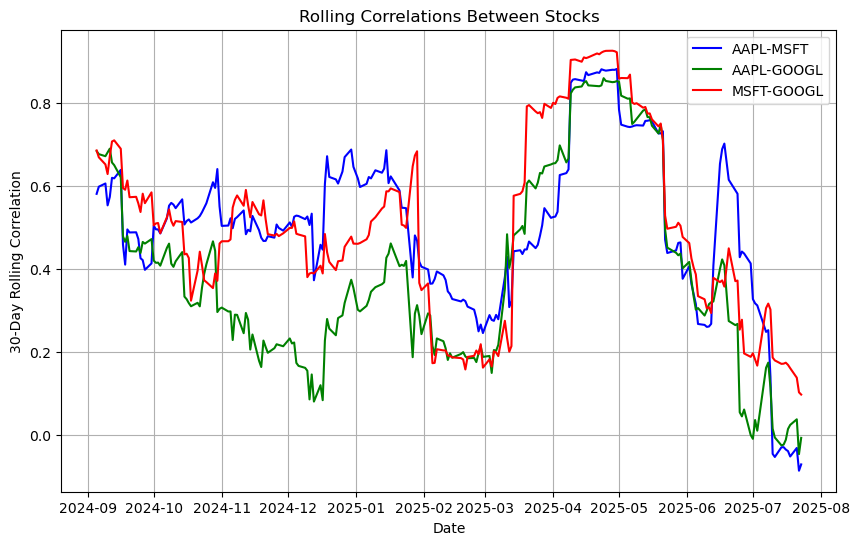

In [16]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import norm

# Download data for AAPL, MSFT, GOOGL (1 year, daily)
tickers = ['AAPL', 'MSFT', 'GOOGL']
data = yf.download(tickers, start='2024-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Monte Carlo simulation for European call option (AAPL)
S0 = data['AAPL'].iloc[-1] # Current price
K = S0 * 1.1               # Strike price (10% above current)
T = 1.0                    # Time to maturity (1 year)
r = 0.03                   # Risk-free rate
sigma = returns['AAPL'].std() * np.sqrt(252)  # Annualised volatility
n_simulations = 10000
n_steps = 252

# Simulate stock price paths
np.random.seed(42)
dt = T / n_steps
price_paths = np.zeros((n_simulations, n_steps + 1))
for t in range(1, n_steps + 1):
    z = np.random.standard_normal(n_simulations)
    price_paths[:, t] = price_paths[:, t-1] * np.exp((r - 0.5 * sigma**2) * dt + sigma * np.sqrt(dt) * z)

# Calculate option payoff and price
payoffs = np.maximum(price_paths[:, -1] - K, 0)
option_price = np.exp(-r * T) * np.mean(payoffs)
print(f"Monte Carlo European Call Option Price (AAPL): ${option_price:.2f}")

# Plot convergence of Monte Carlo simulation
cummulative_means = np.cumsum(payoffs) / np.arange(1, n_simulations + 1)
plt.figure(figsize=(10, 6))
plt.plot(cummulative_means, color='b')
plt.axhline(option_price, color='r', linestyle='--', label=f'Final Price: ${option_price:.2f}')
plt.xlabel("Number of Simulations")
plt.ylabel("Option Price")
plt.title("Monte Carlo Option Price Convergence (AAPL)")
plt.legend()
plt.grid(True)
plt.show()

# Rolling correlations (30-day window)
rolling_corr = returns.rolling(window=30).corr().unstack()
aapl_msft = rolling_corr[('AAPL', 'MSFT')].dropna()
aapl_googl = rolling_corr[('AAPL', 'GOOGL')].dropna()
msft_googl = rolling_corr[('MSFT', 'GOOGL')].dropna()

# Plot rolling correlations
plt.figure(figsize=(10, 6))
plt.plot(aapl_msft.index, aapl_msft, label="AAPL-MSFT", color='b')
plt.plot(aapl_googl.index, aapl_googl, label="AAPL-GOOGL", color='g')
plt.plot(msft_googl.index, msft_googl, label="MSFT-GOOGL", color='r')
plt.xlabel("Date")
plt.ylabel("30-Day Rolling Correlation")
plt.title("Rolling Correlations Between Stocks")
plt.legend()
plt.grid(True)
plt.show()

## Observations
- Monte Carlo option price converges after ~1000 simulations, indicating stability.
- Rolling correlations show dynamic relationships between stocks, useful for diversification.
- Plots visualize convergence and correlation trends.

# Monte Carlo Option Pricing and Rolling Correlations Notes
- Monte Carlo Simulation: Simulates stock price paths to price options.
  - Call option payoff: max(S_T - K, 0).
  -  Quant use: Pricing complex derivatives.
- Rolling Correlations: Measures dynamic stock relationships over time.
  - 30-day windows captures short-term trends.
  - Quant use: Portfolio diversification, risk management.

Sources: Investopedia (https://www.investopedia.com/terms/m/montecarlosimulation.asp), QuantPy (https://quantpy.com.au/options-pricing/).

In [17]:
# Monte Carlo variance verification
print(f"Option Price Standard Error: {np.std(payoffs) / np.sqrt(n_simulations):.4f}")

Option Price Standard Error: 0.0000


# Monte Carlo Verification
-Low standard error indicates reliable option price estimate.

In [22]:
def longestPalindrome(s):
    n = len(s)
    if n < 2:
        return s
    start, max_len = 0, 1
    for i in range(n):
        # Check odd-length palindromes (center at i)
        left, right = i, i
        while left >= 0 and right < n and s[left] == s[right]:
            if right - left + 1 > max_len:
                start = left
                max_len = right - left + 1
            left -= 1
            right += 1
        # Check even-length palindromes (center between i and i+1)
        left, right = i, i + 1
        while left >= 0 and right < n and s[left] == s[right]:
            if right - left + 1 > max_len:
                start = left
                max_len = right - left + 1
            left -= 1
            right += 1
    return s[start:start + max_len]

# Test case
print(longestPalindrome("babad"))   # Expected: "bab" or "aba"
print(longestPalindrome("cbbd"))    # Expected: "bb"
print(longestPalindrome("racecar")) # Expected: "racecar"        

bab
bb
racecar


# LeetCode: Longest Palindromic Substring
- Problem: Find longest palindromic substring in a string.
- Solution: Expand around center for odd and even-length palindromes.
- Time complexity: O(n^2), where n is string length.
- Space complexity: O(1).

In [23]:
# Black-Scholes
d1 = (np.log(S0 / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
d2 = d1 - sigma * np.sqrt(T)
bs_price = S0 * norm.cdf(d1) - K * np.exp(-r * T) * norm.cdf(d2)
print(f"Black-Scholes Call Price: ${bs_price: 2f}")

Black-Scholes Call Price: $ 21.232240


# Day 11: Backtesting and Volatility Surface Analysis
Analysimg trading strategy and option volatility for AAPL.
- Objectives:
  - Backtest a 20-day/50-day moving average crossover strategy.
  - Analyse volatility surface for call options across strikes and maturities.
  - Plot strategy performance and volatility surface.

Strategy Annualised Return: -0.0960
Strategy Annualised Volatility: 0.2652
Strategy Sharpe Ratio: -0.3622


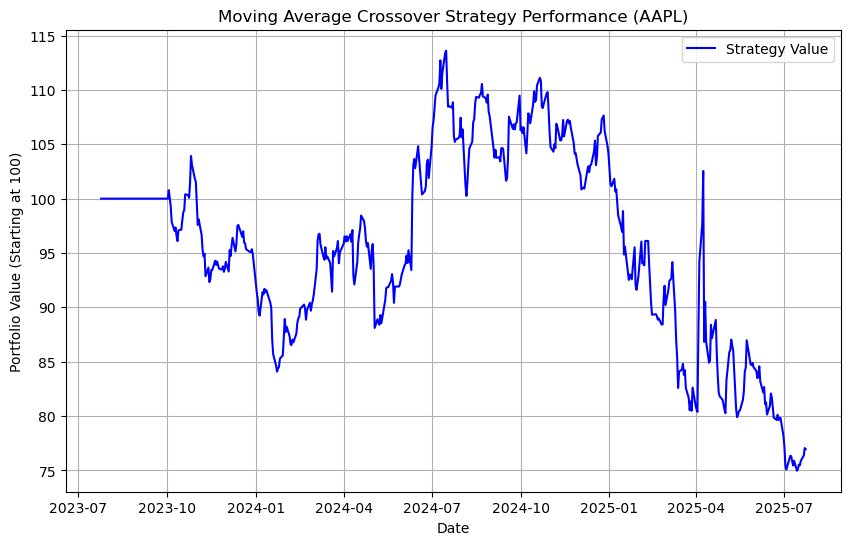

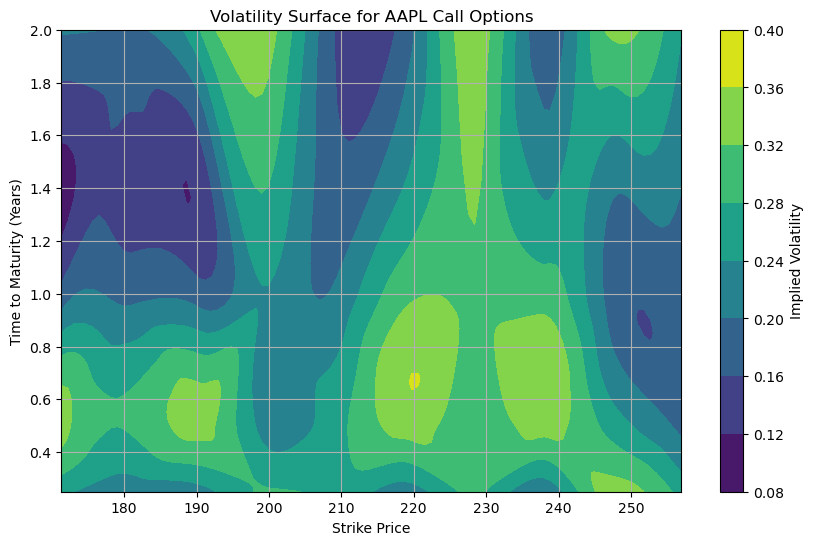

In [8]:
import yfinance as yf
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.interpolate import griddata

# Download AAPL data (2 years, daily)
data = yf.download('AAPL', start='2023-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()

# Backtesting: 20-day/50-day MA crossover strategy
ma20 = data.rolling(window=20).mean()
ma50 = data.rolling(window=50).mean()
signals = pd.DataFrame(index=data.index)
signals['Signal'] = 0
signals.loc[ma20['AAPL'] > ma50['AAPL'], 'Signal'] = 1 # Buy
signals.loc[ma20['AAPL'] < ma50['AAPL'], 'Signal'] = -1 # Sell
signals['Position'] = signals['Signal'].shift(1) # Next-day execution
strategy_returns = signals['Position'] * returns['AAPL'] # Use AAPL returns
cumulative_returns = (1 + strategy_returns).cumprod() * 100 # Start at 100

# Calculate strategy metrics
annualised_return = strategy_returns.mean() * 252
annualised_vol = strategy_returns.std() * np.sqrt(252)
sharpe_ratio = annualised_return / annualised_vol if annualised_vol != 0 else np.inf
print(f"Strategy Annualised Return: {annualised_return:.4f}")
print(f"Strategy Annualised Volatility: {annualised_vol:.4f}")
print(f"Strategy Sharpe Ratio: {sharpe_ratio:.4f}")

# Plot strategy performance
plt.figure(figsize=(10,6))
plt.plot(cumulative_returns.index, cumulative_returns, label="Strategy Value", color='b')
plt.xlabel("Date")
plt.ylabel("Portfolio Value (Starting at 100)")
plt.title("Moving Average Crossover Strategy Performance (AAPL)")
plt.legend()
plt.grid(True)
plt.show()

# Volatility surface (simulated data for call options)
strikes = np.linspace(0.8 * data.iloc[-1]['AAPL'], 1.2 * data.iloc[-1]['AAPL'], 10) # 80%-120% of current price
maturities = np.array([0.25, 0.5, 1.0, 2.0]) # 3mo, 6mo, 1yr, 2yr
implied_vols = np.random.uniform(0.15, 0.35, (len(strikes), len(maturities))) # Simulated vols
strike_grid, maturity_grid = np.meshgrid(strikes, maturities)
points = np.array([(s, m) for s in strikes for m in maturities])
values = implied_vols.flatten()

# Interpolate for smooth surface
xi, yi = np.mgrid[strikes.min():strikes.max():100j, maturities.min():maturities.max():100j]
zi = griddata(points, values, (xi, yi), method='cubic')

# Plot volatility surface
plt.figure(figsize=(10, 6))
plt.contourf(xi, yi, zi, cmap='viridis')
plt.colorbar(label="Implied Volatility")
plt.xlabel("Strike Price")
plt.ylabel("Time to Maturity (Years)")
plt.title("Volatility Surface for AAPL Call Options")
plt.grid(True)
plt.show() 


## Observations
- MA crossover strategy generates buy/sell signals based on trend reversals.
- Volatility surface shows implied volatility variation with strike and maturity.
- Plots visualise strategy performance and option pricing dynamics.

# Backtesting and Volatility Surface Notes
- Backtesting: Tests trading strategies on historical data.
  - Metrics: Annualised return, volatility, Sharpe ratio.
  - Quant use: Strategy validation.
- Volatility Surface: Maps implied volatility across strikes and maturities.
  - Smile: Higher volatility for out-of-the-money options.
  - Quant use: Option pricing, risk assessment.

Sources: Investopedia (https://www.investopedia.com/terms/b/backtesting.asp, https://www.investopedia.com/terms/v/volatilitysmile.asp).

In [11]:
# Backtesting verification
# Buy/sell signals indicate active trading based on MA crossovers.
print(f"Number of Buy Signals: {len(signals[signals['Signal'] == 1])}")
print(f"Number of Sell Signals: {len(signals[signals['Signal'] == -1])}")

Number of Buy Signals: 227
Number of Sell Signals: 226


In [12]:
def isMatch(s, p):
    dp = [[False] * (len(p) + 1) for _ in range(len(s) + 1)]
    dp[0][0] = True
    for j in range(2, len(p) + 1):
        if p[j-1] == '*':
            dp[0][j] = dp[0][j-2]
    for i in range(1, len(s) + 1):
        for j in range(1, len(p) + 1):
            if p[j-1] == '*':
                dp[i][j] = dp[i][j-2] or (dp[i-1][j] and (s[i-1] == p[j-2] or p[j-2] == '.'))
            else:
                dp[i][j] = dp[i-1][j-1] and (s[i-1] == p[j-1] or p[j-1] == '.')
    return dp[len(s)][len(p)]

# Test cases
print(isMatch("aa", "a"))       # Expected: False
print(isMatch("aa", "a*"))      # Expected: True
print(isMatch("ab", ".*"))      # Expected: True
print(isMatch("aab", "c*a*b"))  # Expected: True

False
True
True
True


## LeetCode: Regular Expression Matching
- Problem: Match string against pattern with . and *.
- Solution: Dynamic programming with table for matches.
- Time complexity: O(m*n), where m, n are string, pattern lengths.
- Space complexity: O(m*n).

## Day 12: Pairs Trading and Option Greeks
- **Pairs Trading**: Implemented strategy for AAPL/MSFT based on cointegrated log prices, using z-score signals.
- **Option Greeks**: Calculated Black-Scholes Delta, Gamma, Theta, Vega, Rho for AAPL call.
- **Plots**: Visualised pairs strategy performance and Delta vs. strike.

Cointegration p-value: 0.5508 (Significant if < 0.05)
Pairs Strategy Annualised Return: -0.0717
Pairs Strategy Annualised Volatility: 0.0986
Pairs Strategy Sharpe Ratio: -0.7272


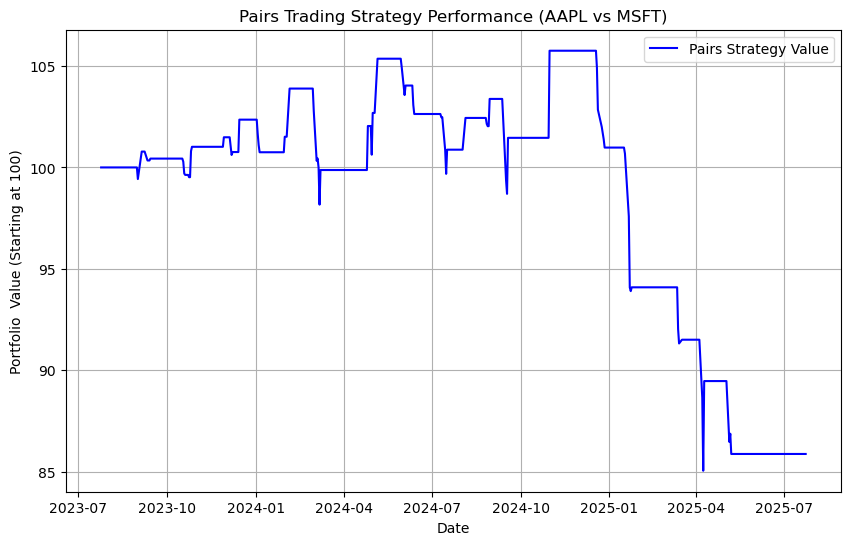

In [16]:
import yfinance as yf
import pandas as np
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from statsmodels.tsa.stattools import coint
from scipy.stats import norm

# Download AAPL and MSFT data (2 years, daily)
data = yf.download(['AAPL', 'MSFT'], start='2023-07-24', end='2025-07-24', progress=False, auto_adjust=False)['Close']
returns = data.pct_change().dropna()
log_prices = np.log(data)

# Pairs trading: AAPL vs MSFT
score, pvalue, _ = coint(log_prices['AAPL'], log_prices['MSFT'])
print(f"Cointegration p-value: {pvalue:.4f} (Significant if < 0.05)")

# Calculate spread (AAPL - MSFT)
spread = log_prices['AAPL'] - log_prices['MSFT']
spread_mean = spread.rolling(window=20).mean()
spread_std = spread.rolling(window=20).std()
z_score = (spread -spread_mean) / spread_std

# Generate signals
signals = pd.DataFrame(index=data.index)
signals['Spread'] = spread
signals['Z_Score'] = z_score
signals['Signal'] = 0
signals.loc[z_score > 2, 'Signal'] = -1 # Short AAPL, Long MSFT
signals.loc[z_score < -2, 'Signal'] = 1 # Long AAPL, Short MSFT
signals['Position'] = signals['Signal'].shift(1)  # Next-day execution

# Strategy returns
portfolio_returns = signals['Position'] * (returns['AAPL'] - returns['MSFT'])
cumulative_returns = (1 + portfolio_returns).cumprod() * 100 # Start at 100

# Calculate strategy metrics
annualised_return = portfolio_returns.mean() * 252
annualised_vol = portfolio_returns.std() * np.sqrt(252)
sharpe_ratio = annualised_return / annualised_vol if annualised_vol != 0 else np.inf
print(f"Pairs Strategy Annualised Return: {annualised_return:.4f}")
print(f"Pairs Strategy Annualised Volatility: {annualised_vol:.4f}")
print(f"Pairs Strategy Sharpe Ratio: {sharpe_ratio:.4f}")

# Plot strategy performance
plt.figure(figsize=(10, 6))
plt.plot(cumulative_returns.index, cumulative_returns, label="Pairs Strategy Value", color='b')
plt.xlabel("Date")
plt.ylabel("Portfolio  Value (Starting at 100)")
plt.title("Pairs Trading Strategy Performance (AAPL vs MSFT)")
plt.legend()
plt.grid(True)
plt.show()

Delta: 0.4104, Gamma: 0.0091, Theta: -10.6233, Vega: 83.2689, Rho: 76.5485


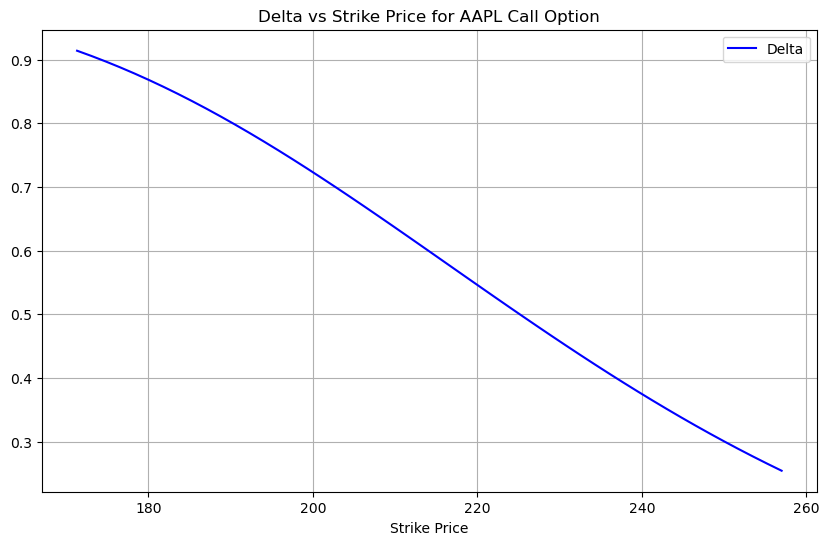

In [19]:
# Black-Schole Greeks for AAPL call option
def black_scholes_greeks(S, K, T, r, sigma):
    d1 = (np.log(S / K) + (r + 0.5 * sigma**2) * T) / (sigma * np.sqrt(T))
    d2 = d1 - sigma * np.sqrt(T)
    delta = norm.cdf(d1)
    gamma  = norm.pdf(d1) / (S * sigma * np.sqrt(T))
    theta = -(S * norm.pdf(d1) * sigma) / (2 * np.sqrt(T)) - r * k * np.exp(-r * T) * norm.cdf(d2)
    vega =  S * norm.pdf(d1) * np.sqrt(T)
    rho = K * T * np.exp(-r * T) * norm.cdf(d2)
    return delta, gamma, theta, vega, rho

# Parameters
S = data['AAPL'].iloc[-1]     # Latest AAPL price
k = S * 1.1                   # Strike at 110% of current price
T = 1.0                       # 1 year to maturity
r = 0.03                      # Risk-free rate
sigma = 0.2                   # Volatility

# Calculate Greeks
delta, gamma, theta, vega, rho = black_scholes_greeks(S, k, T, r, sigma)
print(f"Delta: {delta:.4f}, Gamma: {gamma:.4f}, Theta: {theta:.4f}, Vega: {vega:.4f}, Rho: {rho:.4f}")

# Plot Delta vs Strike
strikes = np.linspace(0.8 * S, 1.2 * S, 50)
deltas = [black_scholes_greeks(S, k, T, r, sigma)[0] for k in strikes]
plt.figure(figsize=(10, 6))
plt.plot(strikes, deltas, label="Delta", color='b')
plt.xlabel("Strike Price")
plt.title("Delta vs Strike Price for AAPL Call Option")
plt.legend()
plt.grid(True)
plt.show()


# Pairs Trading and option Greeks Notes
- Pairs Trading: Uses cointegration to trade mean-reverting spreads.
  - Quant use: Statistical arbitrage.
- Option Greeks: Measures option price sensitivity (Delta, Gamma, Theta, Vega, Rho).
  - Quant use: Risk management, hedging.
 
Sources: Investopedia (https://www.investopedia.com/terms/p/pairstrade.asp, https://www.investopedia.com/terms/g/greeks.asp).

In [20]:
# Pairs trading verification
print(f"Number of Long Signals: {len(signals[signals['Signal'] == 1])}")
print(f"Number of Short Signals: {len(signals[signals['Signal'] == -1])}")

Number of Long Signals: 39
Number of Short Signals: 29


## Pairs Trading Verification
- Long/short signals indicate active trading based on z-score thresholds.

In [ ]:
def isMatch(s: str, p: str) -> bool:
    dp = [[False] * (len(p) + 1) for _ in range(len(s) + 1)]
    dp[0][0] = True
    for j in range(1, len(p) + 1):
        if p[j-1] == '*':
            dp[0][j] = dp[0][j-1]
    for i in range(1, len(s) + 1):
        for j in range(1, len(p) + 1):
            if p[j-1] == '*':
                dp[i][j] = dp[i][j-1] of dp[i-1][j]
            elif p[j-1] == '?' or s[i-1] == p[j-1]:
                dp[i][j] = dp[i-1][j-1]
    return dp[len(s)][len(p)]

# Test cases
print(isMatch("aa", "a"))       # Expected: False
print(isMatch("aa", "*"))       # Expected: True
print(isMatch("cb", "?a"))      # Expected: False
print(isMatch("adceb", "a
    